In [1]:
import numpy as np
import torch

In [2]:
data=open('/home/maria/andrej-karpathy-experiments/shakespeare.txt','r').read()

In [4]:
data[:100]

'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou'

In [13]:
words = data.lower().replace('\n', ' ').strip().split(' ')
print(len(words))
len(set(words))

209892


23642

In [14]:
from collections import Counter

# Count the frequency of each word
word_counts = Counter(words)

# Get the 20 most common words and their counts
most_common_words = word_counts.most_common(200)

# Print the results
for word, count in most_common_words:
    print(f"{word}: {count}")

: 7241
the: 6279
and: 5479
to: 4723
i: 4403
of: 3721
my: 3114
a: 2975
you: 2449
that: 2427
in: 2312
is: 1963
for: 1835
with: 1800
not: 1741
your: 1680
be: 1597
his: 1521
he: 1411
as: 1404
but: 1402
have: 1386
it: 1365
this: 1345
thou: 1297
me: 1118
thy: 1059
will: 948
what: 936
so: 897
by: 872
we: 840
shall: 808
if: 790
our: 786
all: 746
are: 738
him: 715
king: 686
do: 685
no: 682
her: 654
from: 621
good: 600
on: 572
or: 563
at: 550
which: 542
would: 517
they: 515
was: 497
how: 482
than: 478
their: 476
more: 459
she: 457
hath: 445
let: 437
am: 432
i'll: 425
thee: 422
when: 417
duke: 415
now: 398
then: 395
were: 391
make: 387
may: 374
upon: 370
one: 365
you,: 363
an: 361
like: 360
must: 358
should: 354
sir,: 332
had: 331
here: 331
'tis: 322
yet: 320
them: 318
come: 317
first: 309
where: 307
some: 306
did: 305
richard: 289
know: 288
take: 288
give: 286
say: 284
me,: 284
these: 283
such: 280
go: 272
there: 270
o: 268
us: 262
o,: 261
who: 260
see: 255
can: 253
queen: 252
henry: 250
love: 2

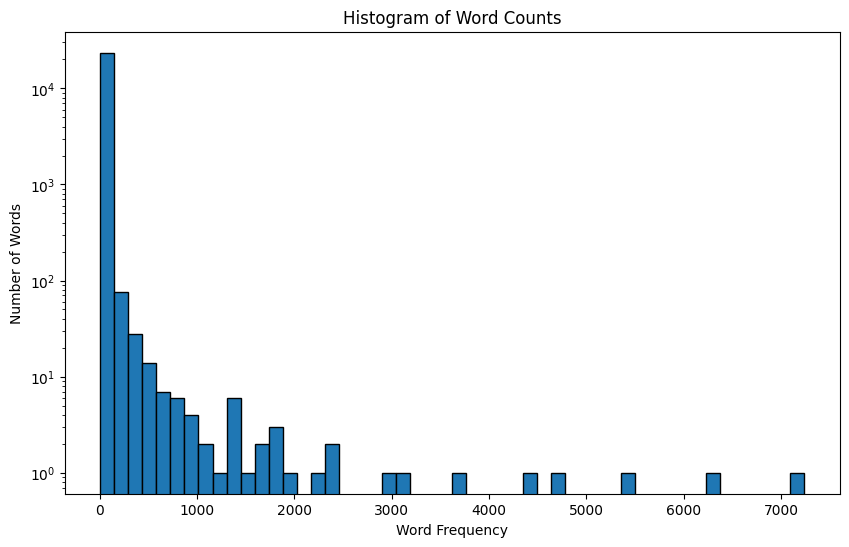

In [18]:
import matplotlib.pyplot as plt

# Get all word counts
word_frequencies = list(word_counts.values())

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(word_frequencies, bins=50, edgecolor='black')
plt.xlabel("Word Frequency")
plt.ylabel("Number of Words")
plt.title("Histogram of Word Counts")
plt.yscale('log')  # Log scale helps to see the distribution better for large ranges
plt.show()


In [20]:
encoder={word:ind for ind,word in enumerate(set(words))}
decoder={ind:word for ind,word in enumerate(set(words))}

def make_cbow_data(words):
    train_data=words[:int(0.8*len(words))]
    val_data=words[int(0.8*len(words)):]
    window=3

    start_ind=0+window
    end_ind=len(train_data)-window

    X=[]
    Y=[]
    for ind in range(start_ind,end_ind):
        context=[train_data[ind-3],train_data[ind-2],train_data[ind-1],train_data[ind+1],train_data[ind+2],train_data[ind+3]]
        target=train_data[ind]
        X.append([encoder[i] for i in context])
        Y.append(encoder[target])
    X=torch.tensor(X)
    Y=torch.tensor(Y)
    return X,Y

X, Y = make_cbow_data(words)
print(X)

        

tensor([[ 4323, 13181,  2109, 18587, 10695, 13671],
        [13181,  2109, 15592, 10695, 13671, 18073],
        [ 2109, 15592, 18587, 13671, 18073,   900],
        ...,
        [12003, 20076, 10910,  2646,  3919, 10726],
        [20076, 10910,  1131,  3919, 10726, 10385],
        [10910,  1131,  2646, 10726, 10385, 17581]])
